In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import os
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier




In [ ]:
RANDOM_STATE = 42

In [ ]:
BASE_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/"
df = pd.read_csv(BASE_URL + "fruits.csv")
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(10)

,Frutto,Peso_g,Diametro_medio_mm,Lunghezza_media_mm,Durezza_buccia_1-10,Dolcezza_1-10
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88
5,Mela,86.05,61.68,3.62,6.51,3.09
6,Mela,99.24,69.19,5.64,5.53,2.15
7,Mela,111.21,67.36,5.47,5.25,3.47
8,Mela,76.60,61.57,6.46,6.28,2.29
9,Mela,86.85,76.00,6.36,6.11,2.78


In [ ]:
# QUICK EDA   EXPLORATIVE DATA ANALYSIS

print("\n--- Info dataset ---")
print(df.info())
print("\n--- Prime righe ---")
print(df.head())
print("\n--- Statistiche descrittive ---")
print(df.describe(include='all'))


--- Info dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Frutto               500 non-null    object 
 1   Peso_g               500 non-null    float64
 2   Diametro_medio_mm    500 non-null    float64
 3   Lunghezza_media_mm   500 non-null    float64
 4   Durezza_buccia_1-10  500 non-null    float64
 5   Dolcezza_1-10        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB
None

--- Prime righe ---
  Frutto  Peso_g  Diametro_medio_mm  Lunghezza_media_mm  Durezza_buccia_1-10  \
0   Mela   86.40              89.68                8.69                 9.61   
1   Mela   77.58              73.45                6.49                 7.20   
2   Mela   81.95              81.66                6.40                 9.09   
3   Mela   66.33              36.71                6.78                 8.2

In [ ]:
for col in df.columns:   # VERIFICA COLONNA PER COLONNA SE CI SONO SPAZI
    if ' ' in col:
        print(f"La colonna '{col}' contiene spazi.")
else:
    print("Nessuna colonna contiene spazi.")

Nessuna colonna contiene spazi.


In [ ]:
TARGET = "Frutto" if "Frutto" in df.columns else df.columns[0]
print(f"\nTarget individuato: {TARGET}")


Target individuato: Frutto


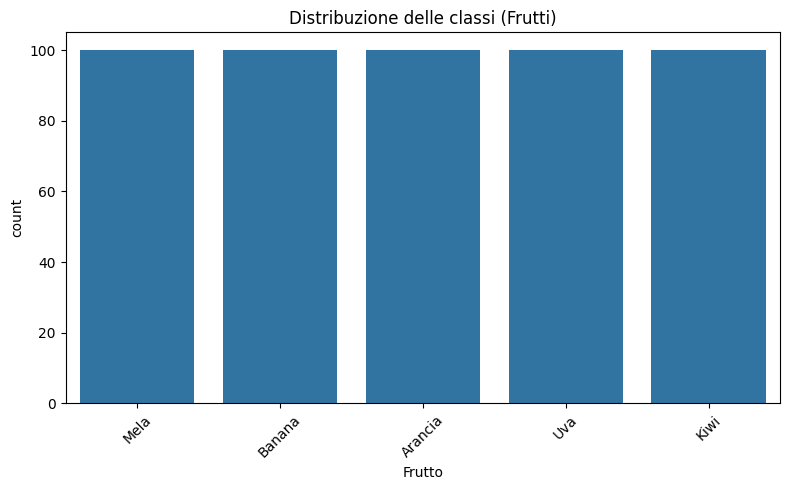

In [ ]:
# Visualizza conteggio classi
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=TARGET, order=df[TARGET].value_counts().index)
plt.title("Distribuzione delle classi (Frutti)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# --- Check missing values ---
print("\nMissing values per colonna:\n", df.isna().sum())


Missing values per colonna:
 Frutto                 0
Peso_g                 0
Diametro_medio_mm      0
Lunghezza_media_mm     0
Durezza_buccia_1-10    0
Dolcezza_1-10          0
dtype: int64


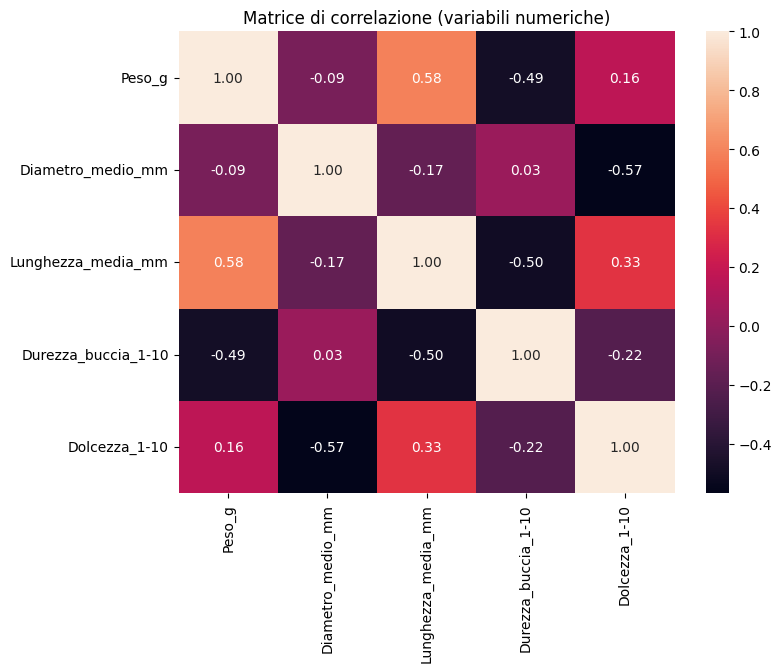

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Matrice di correlazione (variabili numeriche)")
plt.show()

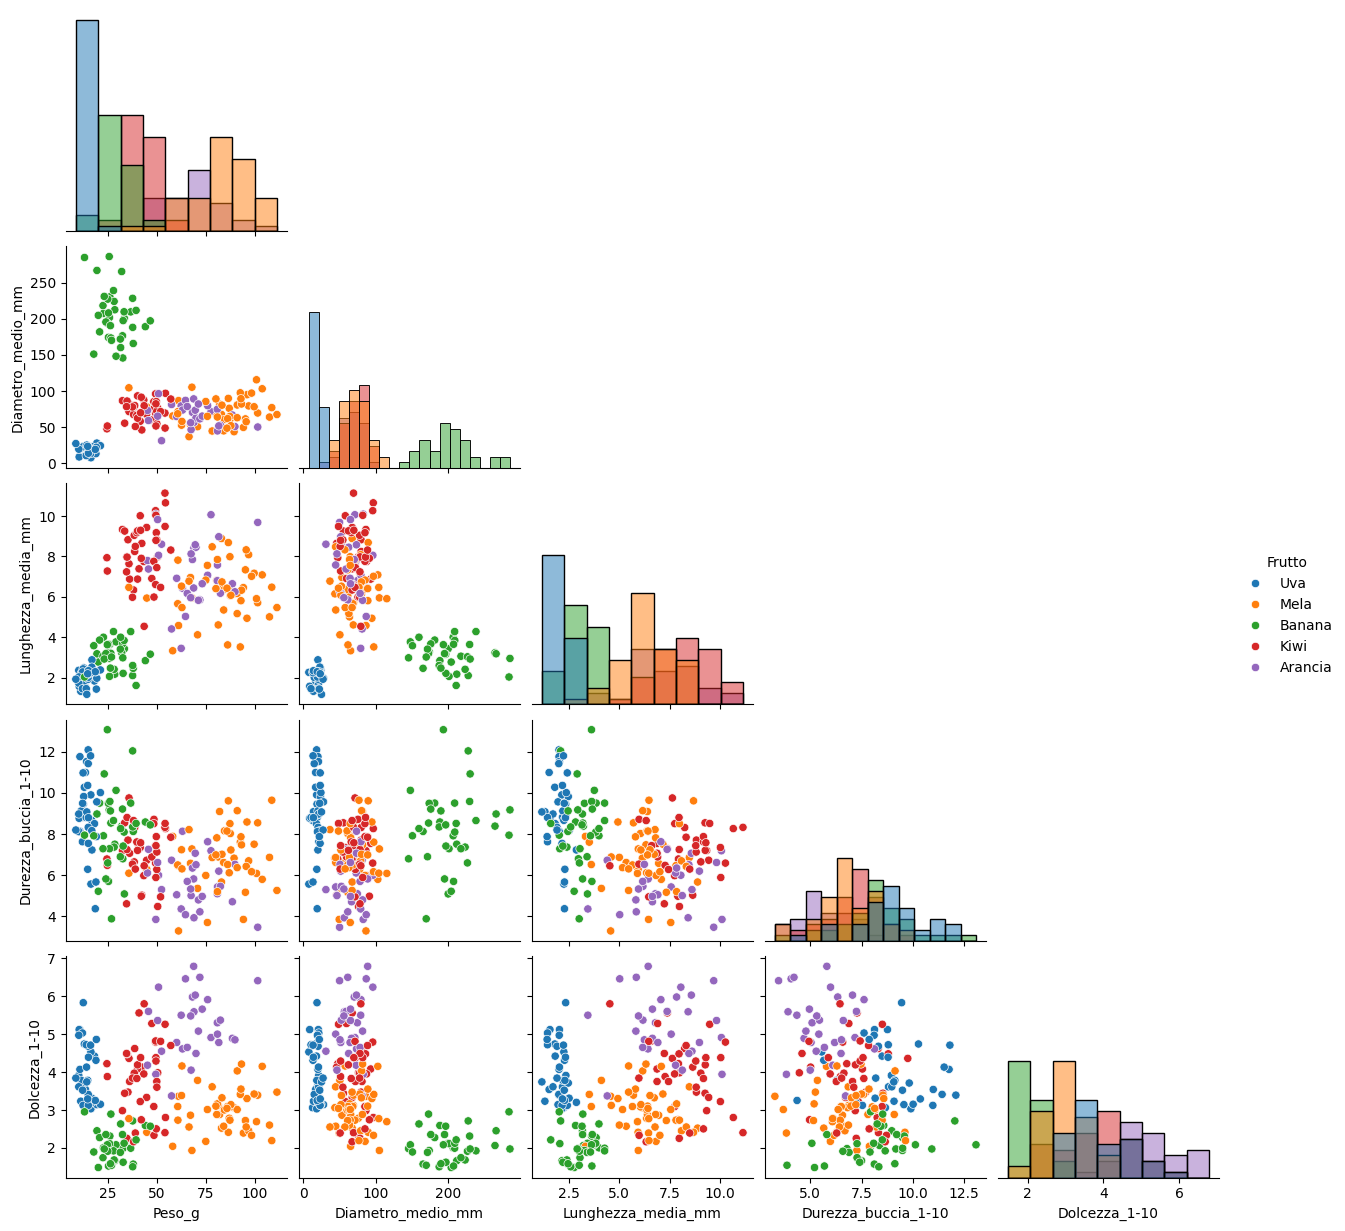

In [ ]:
sample_for_pair = df.sample(n=min(200, len(df)), random_state=RANDOM_STATE)
sns.pairplot(sample_for_pair, vars=num_cols, hue=TARGET, diag_kind='hist', corner=True)
plt.show()

In [ ]:
# --- Prepare X, y ---
X = df[num_cols].copy()
y = df[TARGET].copy()

In [ ]:
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_
print("\nClassi trovate:", list(class_names))


Classi trovate: ['Arancia', 'Banana', 'Kiwi', 'Mela', 'Uva']


In [ ]:
# Split train/test (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, stratify=y_enc, random_state=RANDOM_STATE)

In [ ]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

In [ ]:
X_test_ss = ss.transform(X_test)
display(pd.DataFrame(X_test_ss, columns=X_test.columns).head())

,Peso_g,Diametro_medio_mm,Lunghezza_media_mm,Durezza_buccia_1-10,Dolcezza_1-10
0,1.642948,-0.459585,0.027916,-0.685629,-0.480201
1,-1.014992,-1.073004,-1.167031,1.007224,0.183571
2,-1.342158,-1.069667,-1.317813,0.493908,-0.272272
3,0.723894,-0.118549,-0.145483,0.482986,0.223558
4,0.991297,-0.020020,0.095768,-1.340927,2.150897


In [ ]:
X_train.max()

,0
Peso_g,110.33
Diametro_medio_mm,285.98
Lunghezza_media_mm,10.66
Durezza_buccia_1-10,13.72
Dolcezza_1-10,6.95


In [ ]:
X_train.min()

,0
Peso_g,8.57
Diametro_medio_mm,7.53
Lunghezza_media_mm,1.15
Durezza_buccia_1-10,3.07
Dolcezza_1-10,1.27


In [ ]:
(1-np.isin(y_test, y_train)).sum() #verifica classi mancanti

np.int64(0)

In [ ]:
Ks = [1,2,3,4,5,10,12,15,20,30,40,50]

for K in Ks:  # iteriamo per ogni K in Ks

   print(f"K={K}")

   knn = KNeighborsClassifier(n_neighbors=K, p=1) # controllo parametri knn
   knn.fit(X_train, y_train)

   y_pred_train = knn.predict(X_train) # calcoliamo la previsione del del modello
   y_proba_train = knn.predict_proba(X_train) # calcoliamo la probabilità di appartenenza alle due classi

   y_pred_test = knn.predict(X_test)
   y_proba_test = knn.predict_proba(X_test)

   accuracy_train = accuracy_score(y_train, y_pred_train)
   accuracy_test = accuracy_score(y_test, y_pred_test)

   print(f"ACCURACY: TRAIN={accuracy_train:.3f}, TEST={accuracy_test:.3f}")

K=1
ACCURACY: TRAIN=1.000, TEST=0.767
K=2
ACCURACY: TRAIN=0.923, TEST=0.760
K=3
ACCURACY: TRAIN=0.914, TEST=0.793
K=4
ACCURACY: TRAIN=0.914, TEST=0.840
K=5
ACCURACY: TRAIN=0.903, TEST=0.787
K=10
ACCURACY: TRAIN=0.891, TEST=0.793
K=12
ACCURACY: TRAIN=0.866, TEST=0.813
K=15
ACCURACY: TRAIN=0.854, TEST=0.800
K=20
ACCURACY: TRAIN=0.854, TEST=0.787
K=30
ACCURACY: TRAIN=0.860, TEST=0.787
K=40
ACCURACY: TRAIN=0.863, TEST=0.813
K=50
ACCURACY: TRAIN=0.857, TEST=0.793


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Valutazione su test set

y_pred = knn.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(f"\nAccuracy sul test set: {acc_test:.4f}")

print("\nClassification report (test set):")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy sul test set: 0.7933

Classification report (test set):
              precision    recall  f1-score   support

     Arancia       0.51      0.63      0.57        30
      Banana       1.00      1.00      1.00        30
        Kiwi       0.79      0.77      0.78        30
        Mela       0.71      0.57      0.63        30
         Uva       1.00      1.00      1.00        30

    accuracy                           0.79       150
   macro avg       0.80      0.79      0.80       150
weighted avg       0.80      0.79      0.80       150



Text(0.5, 1.0, 'Confusion Matrix (test set)')

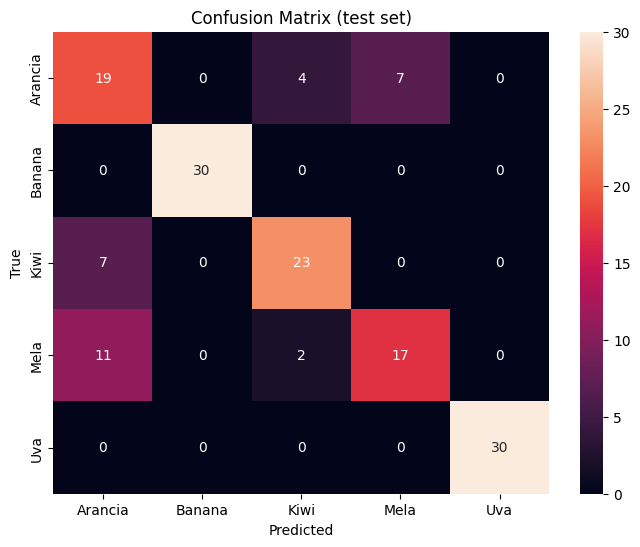

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (test set)")

In [ ]:
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(f"\nAccuracy sul test set: {acc_test:.4f}")


Accuracy sul test set: 0.7933


In [ ]:
print("\nClassification report (test set):")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification report (test set):
              precision    recall  f1-score   support

     Arancia       0.51      0.63      0.57        30
      Banana       1.00      1.00      1.00        30
        Kiwi       0.79      0.77      0.78        30
        Mela       0.71      0.57      0.63        30
         Uva       1.00      1.00      1.00        30

    accuracy                           0.79       150
   macro avg       0.80      0.79      0.80       150
weighted avg       0.80      0.79      0.80       150



### Cross-validation score for the best KNN model

In [ ]:
best_knn = grid_search.best_estimator_

# Perform cross-validation on the scaled training data using the best KNN model
cv_scores = cross_val_score(best_knn, X_train_ss, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)

print(f"Cross-validation F1-weighted scores for the best KNN model: {cv_scores}")
print(f"Mean cross-validation F1-weighted score: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation F1-weighted scores: {np.std(cv_scores):.4f}")

Cross-validation F1-weighted scores for the best KNN model: [0.94164456 0.9301351  0.95785314 0.97185185 0.91277778]
Mean cross-validation F1-weighted score: 0.9429
Standard deviation of cross-validation F1-weighted scores: 0.0207


### Visualize Learning Curve

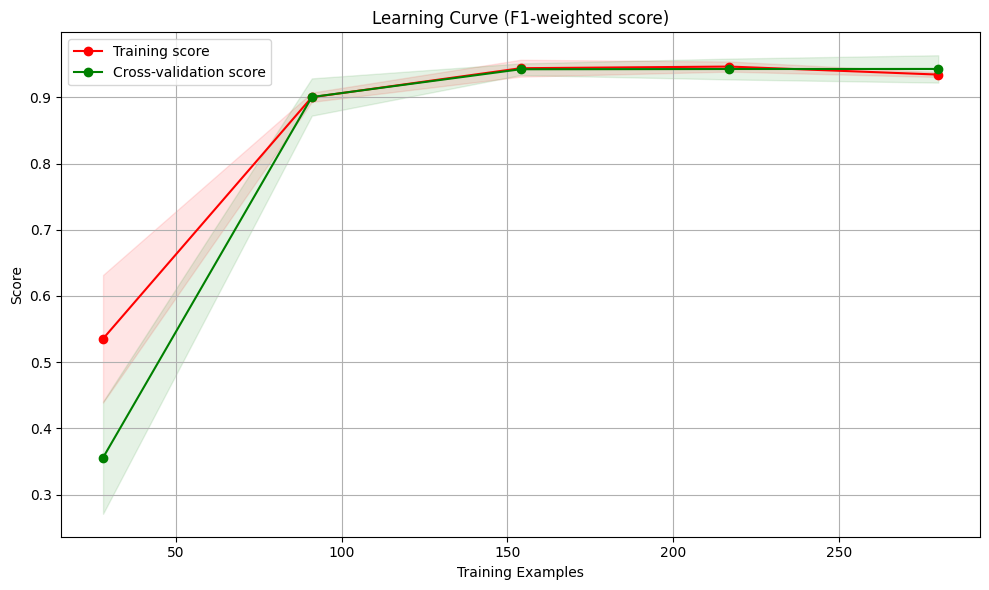

In [ ]:
from sklearn.model_selection import learning_curve

# Use the best KNN model found by GridSearchCV
model = best_knn

# Define train sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_ss, y_train, cv=cv, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 5), scoring='f1_weighted'
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve (F1-weighted score)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

# Task
Visualize the classification report for the best KNN model using a bar chart, showing precision, recall, and F1-score for each fruit class. Additionally, create a normalized confusion matrix plot for the best KNN model to identify misclassification patterns. Finally, analyze the model's performance based on these visualizations and the classification report to identify areas for improvement and propose actionable next steps for enhancing accuracy, especially for underperforming classes.

## Visualize Classification Report

### Subtask:
Generate a plot (e.g., bar chart) to visually represent the precision, recall, and F1-score for each fruit class from the classification report of the best KNN model. This will make it easier to compare performance metrics across different classes.


**Reasoning**:
The previous `knn` model was trained on unscaled data (`X_train`), but the subtask specifies generating the classification report using scaled data (`X_test_ss`). To ensure consistency and correct evaluation, I need to retrain the `knn` model with `n_neighbors=4` on the scaled training data (`X_train_ss`) before generating the classification report on the scaled test data (`X_test_ss`) and visualizing its metrics.



<Figure size 1000x600 with 0 Axes>

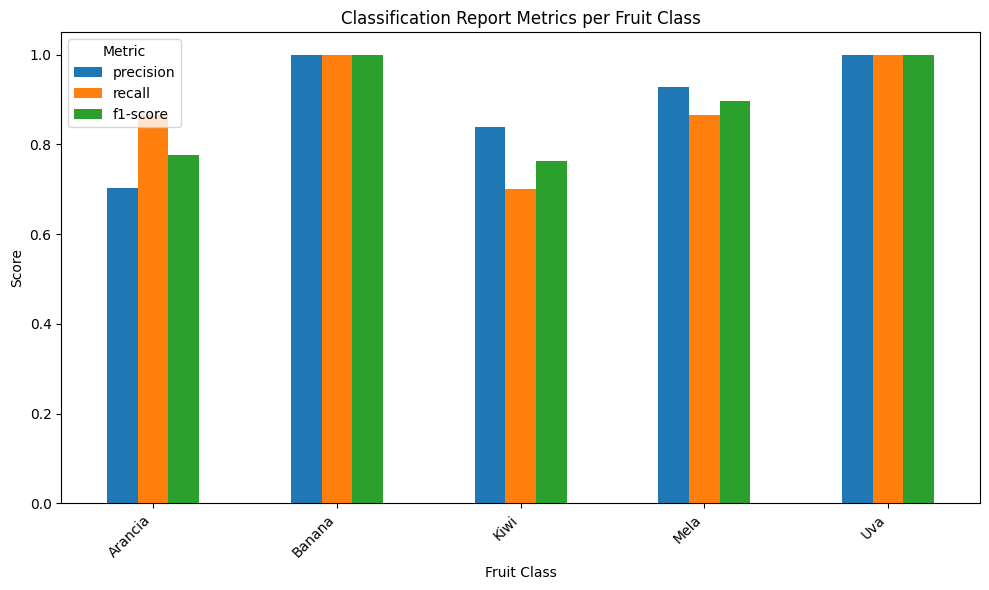

In [ ]:
knn_scaled = KNeighborsClassifier(n_neighbors=4)
knn_scaled.fit(X_train_ss, y_train)

# Generate classification report
report_dict = classification_report(y_test, knn_scaled.predict(X_test_ss), target_names=class_names, output_dict=True)

# Convert to DataFrame and clean
df_report = pd.DataFrame(report_dict).transpose()
df_report = df_report.drop(labels=['accuracy', 'macro avg', 'weighted avg'])

# Plotting
plt.figure(figsize=(10, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics per Fruit Class')
plt.xlabel('Fruit Class')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous step successfully generated and displayed the bar chart for the classification report, completing the first part of the subtask. The next step, as per the main task, is to create a normalized confusion matrix plot for the best KNN model to identify misclassification patterns.



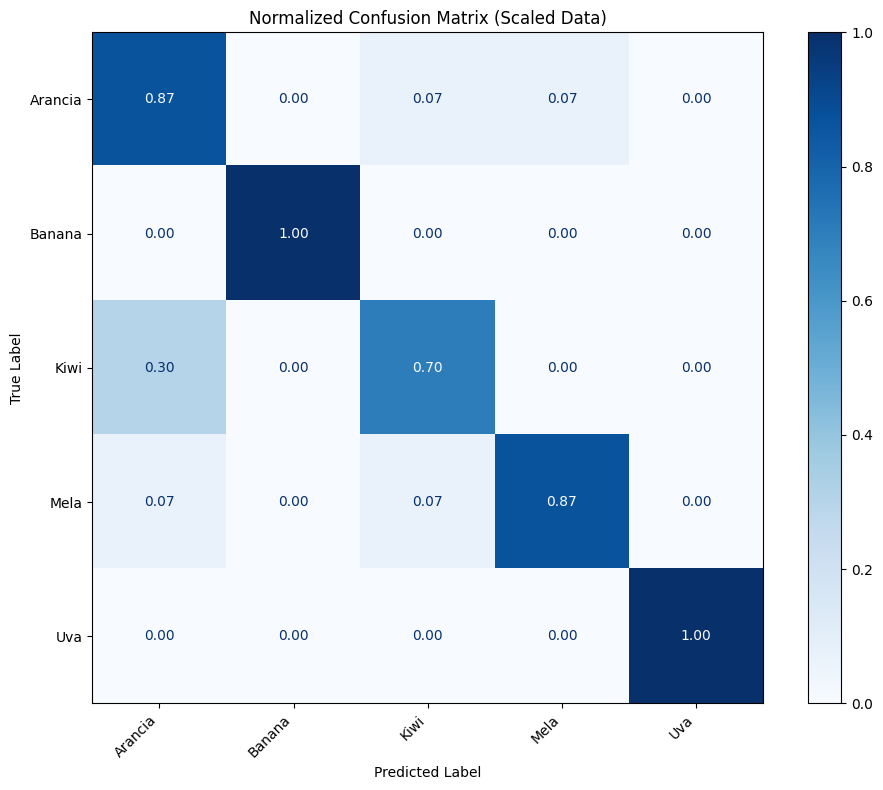

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the scaled test set using the best scaled KNN model
y_pred_scaled = knn_scaled.predict(X_test_ss)

# Calculate the confusion matrix
cm_scaled = confusion_matrix(y_test, y_pred_scaled, normalize='true')

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_scaled, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), values_format=".2f")
plt.title('Normalized Confusion Matrix (Scaled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis of Model Performance and Next Steps

**1. Analysis of Classification Report (Bar Chart):**
*   **Strong Performance:** 'Banana' and 'Uva' classes show perfect or near-perfect precision, recall, and F1-scores (all 1.00 or very close), indicating the model classifies these fruits extremely well.
*   **Good Performance:** 'Mela' performs well with precision and recall around 0.87-0.93 and an F1-score of 0.90.
*   **Moderate Performance:** 'Arancia' has good recall (0.87) but lower precision (0.70) and F1-score (0.78), suggesting that while it correctly identifies most 'Arancia' (high recall), it also incorrectly labels other fruits as 'Arancia' quite often (lower precision).
*   **Weakest Performance:** 'Kiwi' has the lowest recall (0.70) and a moderate precision (0.84), leading to the lowest F1-score (0.76). This means the model frequently misses actual 'Kiwi' instances (lower recall) and also sometimes misclassifies other fruits as 'Kiwi', though less frequently than 'Arancia'.

**2. Analysis of Normalized Confusion Matrix:**
*   **'Banana' and 'Uva':** The diagonal elements for these classes are 1.00, confirming perfect classification with no misclassifications.
*   **'Mela':** The diagonal element is 0.87, aligning with the good performance. There are minor misclassifications, for example, 7% of actual 'Mela' are predicted as 'Arancia'.
*   **'Arancia':** The diagonal element is 0.87, which is high for recall, but off-diagonal elements show misclassifications. Specifically, 7% of actual 'Arancia' are misclassified as 'Kiwi', and 7% as 'Mela'. This confirms the lower precision observed in the classification report for 'Arancia'. The `cm_scaled` variable in the kernel state shows 0.866 for Arancia on the diagonal, and 0.0667 (7%) each for Kiwi and Mela.
*   **'Kiwi':** The diagonal element is 0.70, which is the lowest, confirming the poor recall. Significant misclassifications are seen: 30% of actual 'Kiwi' are misclassified as 'Arancia'. This is a major area for improvement.

**3. Areas for Improvement and Next Steps:**
*   **Focus on 'Kiwi' and 'Arancia'**: These are the classes with the most noticeable performance issues.
*   **Feature Engineering**: The model struggles to distinguish 'Kiwi' and 'Arancia' from other fruits. Consider creating new features that might better capture the unique characteristics of these fruits. For example, if there are additional properties like texture or color available, they could be highly beneficial.
*   **Data Augmentation**: If the dataset is imbalanced or if 'Kiwi' and 'Arancia' samples are not sufficiently diverse, augmenting the data for these classes could help the model learn better representations.
*   **Algorithm Tuning**: While KNN was used, other classification algorithms (e.g., Support Vector Machines, Random Forests, Gradient Boosting) might perform better on these specific classes. Experiment with different models.
*   **Hyperparameter Optimization for KNN**: Even with the current `n_neighbors=4`, further fine-tuning of KNN parameters, including different distance metrics (`p` value for Minkowski distance) or considering adaptive weights based on distance, could yield improvements, especially for misclassified instances.
*   **Error Analysis**: Manually inspect the misclassified instances of 'Kiwi' and 'Arancia' in the test set. What common characteristics do they share with the fruits they are misclassified as? This qualitative analysis can guide feature engineering efforts or data collection.
*   **Collect More Data**: If possible, acquiring more diverse data specifically for 'Kiwi' and 'Arancia' could significantly improve performance.

## Final Task

### Subtask:
Summarize the findings from the performance analysis, highlight the key improvement areas identified, and propose actionable next steps for enhancing the model's accuracy, especially for underperforming classes.


## Summary:

### Q&A
The model's performance was analyzed based on visualizations of the classification report and a normalized confusion matrix, identifying areas for improvement and proposing actionable next steps for enhancing accuracy, especially for underperforming classes.

### Data Analysis Key Findings
*   **Strong Performance:** 'Banana' and 'Uva' classes exhibit perfect or near-perfect precision, recall, and F1-scores (around 1.00), indicating excellent classification.
*   **Good Performance:** 'Mela' performs well with precision and recall around 0.87-0.93 and an F1-score of 0.90. The confusion matrix shows minor misclassifications, with 7% of actual 'Mela' being predicted as 'Arancia'.
*   **Moderate Performance:** 'Arancia' has good recall (0.87) but lower precision (0.70) and an F1-score of 0.78. The confusion matrix reveals that 7% of actual 'Arancia' are misclassified as 'Kiwi' and another 7% as 'Mela'.
*   **Weakest Performance:** 'Kiwi' shows the lowest recall (0.70) and an F1-score of 0.76. A significant issue is that 30% of actual 'Kiwi' instances are misclassified as 'Arancia'.

### Insights or Next Steps
*   **Focus on Underperforming Classes:** Prioritize improving the model's performance for 'Kiwi' and 'Arancia' by exploring feature engineering, data augmentation, and different classification algorithms beyond KNN.
*   **Error Analysis & Data Collection:** Conduct a detailed error analysis on misclassified 'Kiwi' and 'Arancia' instances to understand common patterns, which can inform targeted data collection or feature development efforts.
